In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_date = datetime(2013,1,1,0,0,0);
end_date = datetime(2014,1,1,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130106_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130113_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130120_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130127_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130203_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130210_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130217_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130224_v1.0

In [3]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=6,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 75694
Date :  2013-01-06 00:46:00
L-shell :  6.025259
Burst # 20 / 75694
Date :  2013-01-06 02:06:00
L-shell :  4.105054
Burst # 40 / 75694
Date :  2013-01-06 03:26:00
L-shell :  5.34443
Burst # 60 / 75694
Date :  2013-01-06 08:02:00
L-shell :  4.371064
Burst # 80 / 75694
Date :  2013-01-06 09:22:00
L-shell :  5.336666
Burst # 100 / 75694
Date :  2013-01-06 14:26:00
L-shell :  4.387537
Burst # 120 / 75694
Date :  2013-01-06 15:46:00
L-shell :  4.947075
Burst # 140 / 75694
Date :  2013-01-06 20:14:00
L-shell :  4.558106
Burst # 160 / 75694
Date :  2013-01-06 21:34:00
L-shell :  4.79119
Burst # 180 / 75694
Date :  2013-01-07 01:26:00
L-shell :  4.562503
Burst # 200 / 75694
Date :  2013-01-07 02:46:00
L-shell :  4.339169
Burst # 220 / 75694
Date :  2013-01-07 07:30:00
L-shell :  4.828287
Burst # 240 / 75694
Date :  2013-01-07 08:50:00
L-shell :  4.577176
Burst # 260 / 75694
Date :  2013-01-07 14:06:00
L-shell :  4.63813
Burst # 280 / 75694
Date :  2013-01-07 15:26:00
L-shell :

L-shell :  6.738189
Burst # 2420 / 75694
Date :  2013-01-20 07:18:00
L-shell :  4.494448
Burst # 2440 / 75694
Date :  2013-01-20 08:38:00
L-shell :  6.214229
Burst # 2460 / 75694
Date :  2013-01-20 13:30:00
L-shell :  4.391867
Burst # 2480 / 75694
Date :  2013-01-20 14:50:00
L-shell :  4.944031
Burst # 2500 / 75694
Date :  2013-01-20 18:14:00
L-shell :  7.050039
Burst # 2520 / 75694
Date :  2013-01-20 19:34:00
L-shell :  4.320608
Burst # 2540 / 75694
Date :  2013-01-20 20:54:00
L-shell :  5.215638
Burst # 2560 / 75694
Date :  2013-01-20 23:30:00
L-shell :  6.932776
Burst # 2580 / 75694
Date :  2013-01-21 00:50:00
L-shell :  4.242167
Burst # 2600 / 75694
Date :  2013-01-21 02:10:00
L-shell :  4.765637
Burst # 2620 / 75694
Date :  2013-01-21 06:02:00
L-shell :  5.993124
Burst # 2640 / 75694
Date :  2013-01-21 07:22:00
L-shell :  4.313996
Burst # 2660 / 75694
Date :  2013-01-21 08:42:00
L-shell :  6.474292
Burst # 2680 / 75694
Date :  2013-01-21 13:10:00
L-shell :  4.634572
Burst # 2700 /

Burst # 4980 / 75694
Date :  2013-02-01 07:22:00
L-shell :  4.77252
Burst # 5000 / 75694
Date :  2013-02-01 11:54:00
L-shell :  5.668421
Burst # 5020 / 75694
Date :  2013-02-01 13:14:00
L-shell :  4.264497
Burst # 5040 / 75694
Date :  2013-02-01 14:34:00
L-shell :  6.08821
Burst # 5060 / 75694
Date :  2013-02-01 18:18:00
L-shell :  4.714959
Burst # 5080 / 75694
Date :  2013-02-01 19:38:00
L-shell :  4.580831
Burst # 5100 / 75694
Date :  2013-02-01 22:46:00
L-shell :  6.847585
Burst # 5120 / 75694
Date :  2013-02-02 00:06:00
L-shell :  4.207079
Burst # 5140 / 75694
Date :  2013-02-02 01:26:00
L-shell :  4.890903
Burst # 5160 / 75694
Date :  2013-02-02 05:46:00
L-shell :  4.877897
Burst # 5180 / 75694
Date :  2013-02-02 07:06:00
L-shell :  4.600647
Burst # 5200 / 75694
Date :  2013-02-03 00:34:00
L-shell :  4.116948
Burst # 5220 / 75694
Date :  2013-02-03 01:54:00
L-shell :  6.277424
Burst # 5240 / 75694
Date :  2013-02-03 05:26:00
L-shell :  5.246049
Burst # 5260 / 75694
Date :  2013-02

Burst # 7380 / 75694
Date :  2013-02-17 04:46:00
L-shell :  4.735765
Burst # 7400 / 75694
Date :  2013-02-17 06:06:00
L-shell :  4.644645
Burst # 7420 / 75694
Date :  2013-02-17 10:54:00
L-shell :  5.423424
Burst # 7440 / 75694
Date :  2013-02-17 12:14:00
L-shell :  4.307369
Burst # 7460 / 75694
Date :  2013-02-17 13:34:00
L-shell :  6.454064
Burst # 7480 / 75694
Date :  2013-02-17 17:38:00
L-shell :  4.435372
Burst # 7500 / 75694
Date :  2013-02-17 21:58:00
L-shell :  5.904654
Burst # 7520 / 75694
Date :  2013-02-17 23:18:00
L-shell :  4.110741
Burst # 7540 / 75694
Date :  2013-02-18 00:38:00
L-shell :  5.651885
Burst # 7560 / 75694
Date :  2013-02-18 05:06:00
L-shell :  4.337075
Burst # 7580 / 75694
Date :  2013-02-18 06:26:00
L-shell :  5.224944
Burst # 7600 / 75694
Date :  2013-02-18 11:26:00
L-shell :  4.471117
Burst # 7620 / 75694
Date :  2013-02-18 12:46:00
L-shell :  4.799349
Burst # 7640 / 75694
Date :  2013-02-18 16:46:00
L-shell :  5.300089
Burst # 7660 / 75694
Date :  2013-

Burst # 9960 / 75694
Date :  2013-03-02 15:22:00
L-shell :  7.356912
Burst # 9980 / 75694
Date :  2013-03-02 16:42:00
L-shell :  4.42333
Burst # 10000 / 75694
Date :  2013-03-02 18:02:00
L-shell :  5.345496
Burst # 10020 / 75694
Date :  2013-03-02 21:14:00
L-shell :  5.548444
Burst # 10040 / 75694
Date :  2013-03-02 22:34:00
L-shell :  4.136341
Burst # 10060 / 75694
Date :  2013-03-02 23:54:00
L-shell :  6.211472
Burst # 10080 / 75694
Date :  2013-03-03 03:30:00
L-shell :  5.228621
Burst # 10100 / 75694
Date :  2013-03-03 04:50:00
L-shell :  4.449441
Burst # 10120 / 75694
Date :  2013-03-03 06:10:00
L-shell :  10.95369
Burst # 10140 / 75694
Date :  2013-03-03 10:38:00
L-shell :  4.411171
Burst # 10160 / 75694
Date :  2013-03-03 11:58:00
L-shell :  4.966935
Burst # 10180 / 75694
Date :  2013-03-03 15:10:00
L-shell :  7.77619
Burst # 10200 / 75694
Date :  2013-03-03 16:30:00
L-shell :  4.450503
Burst # 10220 / 75694
Date :  2013-03-03 17:50:00
L-shell :  5.004458
Burst # 10240 / 75694
Da

Burst # 12360 / 75694
Date :  2013-03-13 10:50:00
L-shell :  4.457895
Burst # 12380 / 75694
Date :  2013-03-13 12:10:00
L-shell :  7.456912
Burst # 12400 / 75694
Date :  2013-03-13 15:46:00
L-shell :  4.412062
Burst # 12420 / 75694
Date :  2013-03-13 17:06:00
L-shell :  4.846785
Burst # 12440 / 75694
Date :  2013-03-13 20:10:00
L-shell :  6.44633
Burst # 12460 / 75694
Date :  2013-03-13 21:30:00
L-shell :  4.156871
Burst # 12480 / 75694
Date :  2013-03-13 22:50:00
L-shell :  5.322735
Burst # 12500 / 75694
Date :  2013-03-14 02:38:00
L-shell :  5.306413
Burst # 12520 / 75694
Date :  2013-03-14 03:58:00
L-shell :  4.323688
Burst # 12540 / 75694
Date :  2013-03-14 05:18:00
L-shell :  7.439303
Burst # 12560 / 75694
Date :  2013-03-14 09:58:00
L-shell :  4.359051
Burst # 12580 / 75694
Date :  2013-03-14 11:18:00
L-shell :  5.143366
Burst # 12600 / 75694
Date :  2013-03-14 14:50:00
L-shell :  5.97911
Burst # 12620 / 75694
Date :  2013-03-14 16:10:00
L-shell :  4.309685
Burst # 12640 / 75694


Burst # 14760 / 75694
Date :  2013-03-24 20:58:00
L-shell :  4.131786
Burst # 14780 / 75694
Date :  2013-03-24 22:18:00
L-shell :  5.995135
Burst # 14800 / 75694
Date :  2013-03-25 01:58:00
L-shell :  5.093299
Burst # 14820 / 75694
Date :  2013-03-25 03:18:00
L-shell :  4.339852
Burst # 14840 / 75694
Date :  2013-03-25 04:38:00
L-shell :  7.77183
Burst # 14860 / 75694
Date :  2013-03-25 08:58:00
L-shell :  4.539732
Burst # 14880 / 75694
Date :  2013-03-25 10:18:00
L-shell :  4.77609
Burst # 14900 / 75694
Date :  2013-03-25 13:38:00
L-shell :  7.468652
Burst # 14920 / 75694
Date :  2013-03-25 14:58:00
L-shell :  4.395773
Burst # 14940 / 75694
Date :  2013-03-25 16:18:00
L-shell :  4.915721
Burst # 14960 / 75694
Date :  2013-03-25 19:30:00
L-shell :  6.06945
Burst # 14980 / 75694
Date :  2013-03-25 20:50:00
L-shell :  4.134458
Burst # 15000 / 75694
Date :  2013-03-25 22:10:00
L-shell :  5.794997
Burst # 15020 / 75694
Date :  2013-03-26 01:54:00
L-shell :  5.10127
Burst # 15040 / 75694
Da

Burst # 17380 / 75694
Date :  2013-04-06 01:34:00
L-shell :  4.495333
Burst # 17400 / 75694
Date :  2013-04-06 02:54:00
L-shell :  4.753136
Burst # 17420 / 75694
Date :  2013-04-06 07:34:00
L-shell :  5.598769
Burst # 17440 / 75694
Date :  2013-04-06 08:54:00
L-shell :  4.355294
Burst # 17460 / 75694
Date :  2013-04-06 10:14:00
L-shell :  6.56912
Burst # 17480 / 75694
Date :  2013-04-06 13:42:00
L-shell :  4.860852
Burst # 17500 / 75694
Date :  2013-04-06 15:02:00
L-shell :  4.408628
Burst # 17520 / 75694
Date :  2013-04-06 16:22:00
L-shell :  7.899251
Burst # 17540 / 75694
Date :  2013-04-06 19:38:00
L-shell :  4.280661
Burst # 17560 / 75694
Date :  2013-04-06 20:58:00
L-shell :  4.898828
Burst # 17580 / 75694
Date :  2013-04-07 00:42:00
L-shell :  5.984291
Burst # 17600 / 75694
Date :  2013-04-07 02:02:00
L-shell :  4.257179
Burst # 17620 / 75694
Date :  2013-04-07 03:22:00
L-shell :  6.09587
Burst # 17640 / 75694
Date :  2013-04-07 08:10:00
L-shell :  4.470659
Burst # 17660 / 75694


Burst # 19820 / 75694
Date :  2013-04-18 01:38:00
L-shell :  4.334532
Burst # 19840 / 75694
Date :  2013-04-18 06:18:00
L-shell :  7.335772
Burst # 19860 / 75694
Date :  2013-04-18 07:38:00
L-shell :  4.342216
Burst # 19880 / 75694
Date :  2013-04-18 08:58:00
L-shell :  5.362549
Burst # 19900 / 75694
Date :  2013-04-18 12:42:00
L-shell :  5.151048
Burst # 19920 / 75694
Date :  2013-04-18 14:02:00
L-shell :  4.284493
Burst # 19940 / 75694
Date :  2013-04-18 15:22:00
L-shell :  6.675104
Burst # 19960 / 75694
Date :  2013-04-18 18:42:00
L-shell :  4.371781
Burst # 19980 / 75694
Date :  2013-04-18 20:02:00
L-shell :  4.7225
Burst # 20000 / 75694
Date :  2013-04-19 00:02:00
L-shell :  5.508316
Burst # 20020 / 75694
Date :  2013-04-19 01:22:00
L-shell :  4.253398
Burst # 20040 / 75694
Date :  2013-04-19 02:42:00
L-shell :  6.539278
Burst # 20060 / 75694
Date :  2013-04-19 07:22:00
L-shell :  4.443507
Burst # 20080 / 75694
Date :  2013-04-19 08:42:00
L-shell :  4.985497
Burst # 20100 / 75694


Burst # 22340 / 75694
Date :  2013-04-30 18:02:00
L-shell :  4.265101
Burst # 22360 / 75694
Date :  2013-04-30 19:22:00
L-shell :  5.022056
Burst # 22380 / 75694
Date :  2013-04-30 23:02:00
L-shell :  6.00404
Burst # 22400 / 75694
Date :  2013-05-01 00:22:00
L-shell :  4.250434
Burst # 22420 / 75694
Date :  2013-05-01 01:42:00
L-shell :  5.984902
Burst # 22440 / 75694
Date :  2013-05-01 07:02:00
L-shell :  4.596771
Burst # 22460 / 75694
Date :  2013-05-01 11:22:00
L-shell :  6.443964
Burst # 22480 / 75694
Date :  2013-05-01 12:42:00
L-shell :  4.307547
Burst # 22500 / 75694
Date :  2013-05-01 14:02:00
L-shell :  5.723862
Burst # 22520 / 75694
Date :  2013-05-01 18:18:00
L-shell :  4.402757
Burst # 22540 / 75694
Date :  2013-05-01 22:46:00
L-shell :  6.685775
Burst # 22560 / 75694
Date :  2013-05-02 00:06:00
L-shell :  4.285356
Burst # 22580 / 75694
Date :  2013-05-02 01:26:00
L-shell :  5.38758
Burst # 22600 / 75694
Date :  2013-05-02 06:38:00
L-shell :  4.427966
Burst # 22620 / 75694


Burst # 24820 / 75694
Date :  2013-05-12 11:38:00
L-shell :  4.364836
Burst # 24840 / 75694
Date :  2013-05-12 12:58:00
L-shell :  4.798677
Burst # 24860 / 75694
Date :  2013-05-12 15:58:00
L-shell :  7.089541
Burst # 24880 / 75694
Date :  2013-05-12 17:18:00
L-shell :  4.225033
Burst # 24900 / 75694
Date :  2013-05-12 18:38:00
L-shell :  5.211466
Burst # 24920 / 75694
Date :  2013-05-12 22:26:00
L-shell :  5.356378
Burst # 24940 / 75694
Date :  2013-05-12 23:46:00
L-shell :  4.253749
Burst # 24960 / 75694
Date :  2013-05-13 01:06:00
L-shell :  6.707581
Burst # 24980 / 75694
Date :  2013-05-13 05:38:00
L-shell :  4.547736
Burst # 25000 / 75694
Date :  2013-05-13 06:58:00
L-shell :  4.908348
Burst # 25020 / 75694
Date :  2013-05-13 10:34:00
L-shell :  6.181178
Burst # 25040 / 75694
Date :  2013-05-13 11:54:00
L-shell :  4.216701
Burst # 25060 / 75694
Date :  2013-05-13 13:14:00
L-shell :  5.417506
Burst # 25080 / 75694
Date :  2013-05-13 16:18:00
L-shell :  5.663059
Burst # 25100 / 7569

Burst # 27260 / 75694
Date :  2013-05-24 18:14:00
L-shell :  8.330911
Burst # 27280 / 75694
Date :  2013-05-24 22:02:00
L-shell :  4.664159
Burst # 27300 / 75694
Date :  2013-05-24 23:22:00
L-shell :  4.559127
Burst # 27320 / 75694
Date :  2013-05-25 04:42:00
L-shell :  4.980931
Burst # 27340 / 75694
Date :  2013-05-25 06:02:00
L-shell :  4.915937
Burst # 27360 / 75694
Date :  2013-05-25 10:10:00
L-shell :  5.170182
Burst # 27380 / 75694
Date :  2013-05-25 11:30:00
L-shell :  4.298327
Burst # 27400 / 75694
Date :  2013-05-25 12:50:00
L-shell :  6.796895
Burst # 27420 / 75694
Date :  2013-05-25 16:26:00
L-shell :  4.492294
Burst # 27440 / 75694
Date :  2013-05-25 17:46:00
L-shell :  5.843861
Burst # 27460 / 75694
Date :  2013-05-25 22:02:00
L-shell :  4.60867
Burst # 27480 / 75694
Date :  2013-05-25 23:22:00
L-shell :  4.666699
Burst # 27500 / 75694
Date :  2013-05-26 04:18:00
L-shell :  5.51815
Burst # 27520 / 75694
Date :  2013-05-26 05:38:00
L-shell :  4.620758
Burst # 27540 / 75694


Burst # 29760 / 75694
Date :  2013-06-05 05:02:00
L-shell :  4.533911
Burst # 29780 / 75694
Date :  2013-06-05 08:30:00
L-shell :  8.021198
Burst # 29800 / 75694
Date :  2013-06-05 09:50:00
L-shell :  4.485472
Burst # 29820 / 75694
Date :  2013-06-05 11:10:00
L-shell :  4.585636
Burst # 29840 / 75694
Date :  2013-06-05 14:02:00
L-shell :  8.782586
Burst # 29860 / 75694
Date :  2013-06-05 15:22:00
L-shell :  4.426706
Burst # 29880 / 75694
Date :  2013-06-05 16:42:00
L-shell :  4.68761
Burst # 29900 / 75694
Date :  2013-06-05 20:10:00
L-shell :  7.391461
Burst # 29920 / 75694
Date :  2013-06-05 21:30:00
L-shell :  4.345306
Burst # 29940 / 75694
Date :  2013-06-05 22:50:00
L-shell :  4.904699
Burst # 29960 / 75694
Date :  2013-06-06 03:18:00
L-shell :  6.333007
Burst # 29980 / 75694
Date :  2013-06-06 04:38:00
L-shell :  4.487576
Burst # 30000 / 75694
Date :  2013-06-06 05:58:00
L-shell :  7.219595
Burst # 30020 / 75694
Date :  2013-06-06 09:26:00
L-shell :  4.951469
Burst # 30040 / 75694

Burst # 32260 / 75694
Date :  2013-06-16 19:54:00
L-shell :  5.665509
Burst # 32280 / 75694
Date :  2013-06-16 21:14:00
L-shell :  4.213835
Burst # 32300 / 75694
Date :  2013-06-16 22:34:00
L-shell :  6.063138
Burst # 32320 / 75694
Date :  2013-06-17 03:10:00
L-shell :  4.626945
Burst # 32340 / 75694
Date :  2013-06-17 04:30:00
L-shell :  4.843821
Burst # 32360 / 75694
Date :  2013-06-17 08:22:00
L-shell :  5.596911
Burst # 32380 / 75694
Date :  2013-06-17 09:42:00
L-shell :  4.193954
Burst # 32400 / 75694
Date :  2013-06-17 11:02:00
L-shell :  5.790806
Burst # 32420 / 75694
Date :  2013-06-17 14:10:00
L-shell :  4.937746
Burst # 32440 / 75694
Date :  2013-06-17 15:30:00
L-shell :  4.272888
Burst # 32460 / 75694
Date :  2013-06-17 19:26:00
L-shell :  7.019946
Burst # 32480 / 75694
Date :  2013-06-17 20:46:00
L-shell :  4.290552
Burst # 32500 / 75694
Date :  2013-06-17 22:06:00
L-shell :  5.050577
Burst # 32520 / 75694
Date :  2013-06-18 02:46:00
L-shell :  5.1133
Burst # 32540 / 75694


Burst # 34640 / 75694
Date :  2013-06-28 07:54:00
L-shell :  4.986926
Burst # 34660 / 75694
Date :  2013-06-28 09:14:00
L-shell :  4.281207
Burst # 34680 / 75694
Date :  2013-06-28 10:34:00
L-shell :  6.532282
Burst # 34700 / 75694
Date :  2013-06-28 14:26:00
L-shell :  4.27132
Burst # 34720 / 75694
Date :  2013-06-28 19:18:00
L-shell :  5.20173
Burst # 34740 / 75694
Date :  2013-06-28 20:38:00
L-shell :  4.290301
Burst # 34760 / 75694
Date :  2013-06-29 02:18:00
L-shell :  5.016549
Burst # 34780 / 75694
Date :  2013-06-29 03:38:00
L-shell :  5.124693
Burst # 34800 / 75694
Date :  2013-06-29 08:26:00
L-shell :  4.353679
Burst # 34820 / 75694
Date :  2013-06-29 09:46:00
L-shell :  4.965189
Burst # 34840 / 75694
Date :  2013-06-29 13:54:00
L-shell :  4.54779
Burst # 34860 / 75694
Date :  2013-06-29 15:14:00
L-shell :  5.206021
Burst # 34880 / 75694
Date :  2013-06-29 19:30:00
L-shell :  4.735614
Burst # 34900 / 75694
Date :  2013-06-29 20:50:00
L-shell :  4.464949
Burst # 34920 / 75694
D

Burst # 37140 / 75694
Date :  2013-07-10 01:46:00
L-shell :  4.653344
Burst # 37160 / 75694
Date :  2013-07-10 03:06:00
L-shell :  5.398537
Burst # 37180 / 75694
Date :  2013-07-10 06:50:00
L-shell :  5.531954
Burst # 37200 / 75694
Date :  2013-07-10 08:10:00
L-shell :  4.202799
Burst # 37220 / 75694
Date :  2013-07-10 09:30:00
L-shell :  5.915063
Burst # 37240 / 75694
Date :  2013-07-10 13:30:00
L-shell :  4.338812
Burst # 37260 / 75694
Date :  2013-07-10 17:38:00
L-shell :  8.45096
Burst # 37280 / 75694
Date :  2013-07-10 18:58:00
L-shell :  4.483297
Burst # 37300 / 75694
Date :  2013-07-10 20:18:00
L-shell :  4.703336
Burst # 37320 / 75694
Date :  2013-07-11 00:50:00
L-shell :  6.376899
Burst # 37340 / 75694
Date :  2013-07-11 02:10:00
L-shell :  4.434116
Burst # 37360 / 75694
Date :  2013-07-11 03:30:00
L-shell :  7.232339
Burst # 37380 / 75694
Date :  2013-07-11 06:46:00
L-shell :  5.647179
Burst # 37400 / 75694
Date :  2013-07-11 08:06:00
L-shell :  4.257259
Burst # 37420 / 75694

Burst # 39500 / 75694
Date :  2013-07-21 06:50:00
L-shell :  4.358438
Burst # 39520 / 75694
Date :  2013-07-21 08:10:00
L-shell :  4.755901
Burst # 39540 / 75694
Date :  2013-07-21 09:30:00
L-shell :  7.879803
Burst # 39560 / 75694
Date :  2013-07-21 11:34:00
L-shell :  5.468016
Burst # 39580 / 75694
Date :  2013-07-21 12:54:00
L-shell :  4.189329
Burst # 39600 / 75694
Date :  2013-07-21 14:14:00
L-shell :  6.805825
Burst # 39620 / 75694
Date :  2013-07-21 17:42:00
L-shell :  5.20125
Burst # 39640 / 75694
Date :  2013-07-21 19:02:00
L-shell :  4.257633
Burst # 39660 / 75694
Date :  2013-07-21 20:22:00
L-shell :  6.666885
Burst # 39680 / 75694
Date :  2013-07-22 00:30:00
L-shell :  4.944436
Burst # 39700 / 75694
Date :  2013-07-22 01:50:00
L-shell :  4.530964
Burst # 39720 / 75694
Date :  2013-07-22 05:14:00
L-shell :  8.571298
Burst # 39740 / 75694
Date :  2013-07-22 06:34:00
L-shell :  4.54266
Burst # 39760 / 75694
Date :  2013-07-22 07:54:00
L-shell :  4.524906
Burst # 39780 / 75694


Burst # 42140 / 75694
Date :  2013-08-02 05:18:00
L-shell :  5.429475
Burst # 42160 / 75694
Date :  2013-08-02 06:38:00
L-shell :  4.215469
Burst # 42180 / 75694
Date :  2013-08-02 07:58:00
L-shell :  5.958465
Burst # 42200 / 75694
Date :  2013-08-02 10:26:00
L-shell :  6.291832
Burst # 42220 / 75694
Date :  2013-08-02 11:46:00
L-shell :  4.196855
Burst # 42240 / 75694
Date :  2013-08-02 13:06:00
L-shell :  5.47999
Burst # 42260 / 75694
Date :  2013-08-02 16:46:00
L-shell :  5.466482
Burst # 42280 / 75694
Date :  2013-08-02 18:06:00
L-shell :  4.228877
Burst # 42300 / 75694
Date :  2013-08-02 19:26:00
L-shell :  6.27761
Burst # 42320 / 75694
Date :  2013-08-02 23:38:00
L-shell :  5.01436
Burst # 42340 / 75694
Date :  2013-08-03 00:58:00
L-shell :  4.524044
Burst # 42360 / 75694
Date :  2013-08-03 02:18:00
L-shell :  12.14974
Burst # 42380 / 75694
Date :  2013-08-03 05:46:00
L-shell :  4.524439
Burst # 42400 / 75694
Date :  2013-08-03 07:06:00
L-shell :  4.549275
Burst # 42420 / 75694
D

Burst # 44580 / 75694
Date :  2013-08-12 18:02:00
L-shell :  4.682488
Burst # 44600 / 75694
Date :  2013-08-12 22:34:00
L-shell :  6.441013
Burst # 44620 / 75694
Date :  2013-08-12 23:54:00
L-shell :  4.474483
Burst # 44640 / 75694
Date :  2013-08-13 01:14:00
L-shell :  6.820325
Burst # 44660 / 75694
Date :  2013-08-13 05:06:00
L-shell :  4.512661
Burst # 44680 / 75694
Date :  2013-08-13 06:26:00
L-shell :  4.569254
Burst # 44700 / 75694
Date :  2013-08-13 07:46:00
L-shell :  7.434957
Burst # 44720 / 75694
Date :  2013-08-13 10:26:00
L-shell :  4.65811
Burst # 44740 / 75694
Date :  2013-08-13 11:46:00
L-shell :  4.47603
Burst # 44760 / 75694
Date :  2013-08-13 15:46:00
L-shell :  6.304981
Burst # 44780 / 75694
Date :  2013-08-13 17:06:00
L-shell :  4.234802
Burst # 44800 / 75694
Date :  2013-08-13 18:26:00
L-shell :  5.55198
Burst # 44820 / 75694
Date :  2013-08-13 23:22:00
L-shell :  4.519604
Burst # 44840 / 75694
Date :  2013-08-14 00:42:00
L-shell :  5.389834
Burst # 44860 / 75694
D

Burst # 46940 / 75694
Date :  2013-08-23 16:26:00
L-shell :  4.245088
Burst # 46960 / 75694
Date :  2013-08-23 17:46:00
L-shell :  5.624181
Burst # 46980 / 75694
Date :  2013-08-23 22:06:00
L-shell :  5.285828
Burst # 47000 / 75694
Date :  2013-08-23 23:26:00
L-shell :  4.498275
Burst # 47020 / 75694
Date :  2013-08-24 02:58:00
L-shell :  10.27694
Burst # 47040 / 75694
Date :  2013-08-24 04:18:00
L-shell :  4.58457
Burst # 47060 / 75694
Date :  2013-08-24 05:38:00
L-shell :  4.526246
Burst # 47080 / 75694
Date :  2013-08-24 06:58:00
L-shell :  7.291371
Burst # 47100 / 75694
Date :  2013-08-24 08:18:00
L-shell :  8.038042
Burst # 47120 / 75694
Date :  2013-08-24 09:38:00
L-shell :  4.702819
Burst # 47140 / 75694
Date :  2013-08-24 10:58:00
L-shell :  4.427254
Burst # 47160 / 75694
Date :  2013-08-24 14:58:00
L-shell :  6.525701
Burst # 47180 / 75694
Date :  2013-08-24 16:18:00
L-shell :  4.246305
Burst # 47200 / 75694
Date :  2013-08-24 17:38:00
L-shell :  5.465715
Burst # 47220 / 75694

L-shell :  4.290009
Burst # 49320 / 75694
Date :  2013-09-03 17:22:00
L-shell :  6.812715
Burst # 49340 / 75694
Date :  2013-09-03 21:46:00
L-shell :  4.655104
Burst # 49360 / 75694
Date :  2013-09-03 23:06:00
L-shell :  4.941922
Burst # 49380 / 75694
Date :  2013-09-04 03:06:00
L-shell :  5.371131
Burst # 49400 / 75694
Date :  2013-09-04 04:26:00
L-shell :  4.243181
Burst # 49420 / 75694
Date :  2013-09-04 05:46:00
L-shell :  6.108749
Burst # 49440 / 75694
Date :  2013-09-04 08:10:00
L-shell :  6.174572
Burst # 49460 / 75694
Date :  2013-09-04 09:30:00
L-shell :  4.204068
Burst # 49480 / 75694
Date :  2013-09-04 10:50:00
L-shell :  5.604723
Burst # 49500 / 75694
Date :  2013-09-04 14:58:00
L-shell :  4.674418
Burst # 49520 / 75694
Date :  2013-09-04 16:18:00
L-shell :  4.517723
Burst # 49540 / 75694
Date :  2013-09-04 20:34:00
L-shell :  8.202493
Burst # 49560 / 75694
Date :  2013-09-04 21:54:00
L-shell :  4.433842
Burst # 49580 / 75694
Date :  2013-09-04 23:14:00
L-shell :  5.194521


Burst # 51800 / 75694
Date :  2013-09-15 04:06:00
L-shell :  4.499778
Burst # 51820 / 75694
Date :  2013-09-15 05:26:00
L-shell :  7.28834
Burst # 51840 / 75694
Date :  2013-09-15 06:46:00
L-shell :  7.955103
Burst # 51860 / 75694
Date :  2013-09-15 08:06:00
L-shell :  4.685153
Burst # 51880 / 75694
Date :  2013-09-15 09:26:00
L-shell :  4.336877
Burst # 51900 / 75694
Date :  2013-09-15 13:02:00
L-shell :  9.277487
Burst # 51920 / 75694
Date :  2013-09-15 14:22:00
L-shell :  4.507451
Burst # 51940 / 75694
Date :  2013-09-15 15:42:00
L-shell :  4.701413
Burst # 51960 / 75694
Date :  2013-09-15 19:46:00
L-shell :  8.058138
Burst # 51980 / 75694
Date :  2013-09-15 21:06:00
L-shell :  4.450603
Burst # 52000 / 75694
Date :  2013-09-15 22:26:00
L-shell :  5.087695
Burst # 52020 / 75694
Date :  2013-09-16 02:06:00
L-shell :  6.011597
Burst # 52040 / 75694
Date :  2013-09-16 03:26:00
L-shell :  4.225431
Burst # 52060 / 75694
Date :  2013-09-16 04:46:00
L-shell :  5.690717
Burst # 52080 / 75694

Burst # 54180 / 75694
Date :  2013-09-25 21:58:00
L-shell :  5.557656
Burst # 54200 / 75694
Date :  2013-09-26 01:38:00
L-shell :  5.311395
Burst # 54220 / 75694
Date :  2013-09-26 02:58:00
L-shell :  4.262768
Burst # 54240 / 75694
Date :  2013-09-26 04:18:00
L-shell :  6.25245
Burst # 54260 / 75694
Date :  2013-09-26 06:42:00
L-shell :  6.024172
Burst # 54280 / 75694
Date :  2013-09-26 08:02:00
L-shell :  4.139842
Burst # 54300 / 75694
Date :  2013-09-26 09:22:00
L-shell :  5.546367
Burst # 54320 / 75694
Date :  2013-09-26 13:06:00
L-shell :  5.342425
Burst # 54340 / 75694
Date :  2013-09-26 14:26:00
L-shell :  4.290727
Burst # 54360 / 75694
Date :  2013-09-26 15:46:00
L-shell :  6.816151
Burst # 54380 / 75694
Date :  2013-09-26 19:54:00
L-shell :  4.917962
Burst # 54400 / 75694
Date :  2013-09-26 21:14:00
L-shell :  4.483812
Burst # 54420 / 75694
Date :  2013-09-26 22:34:00
L-shell :  8.624388
Burst # 54440 / 75694
Date :  2013-09-27 02:06:00
L-shell :  4.476085
Burst # 54460 / 75694

Burst # 56660 / 75694
Date :  2013-10-06 14:30:00
L-shell :  5.100868
Burst # 56680 / 75694
Date :  2013-10-06 18:22:00
L-shell :  7.623164
Burst # 56700 / 75694
Date :  2013-10-06 19:42:00
L-shell :  4.397249
Burst # 56720 / 75694
Date :  2013-10-06 21:02:00
L-shell :  5.117364
Burst # 56740 / 75694
Date :  2013-10-07 00:38:00
L-shell :  6.170756
Burst # 56760 / 75694
Date :  2013-10-07 01:58:00
L-shell :  4.246596
Burst # 56780 / 75694
Date :  2013-10-07 03:18:00
L-shell :  5.655408
Burst # 56800 / 75694
Date :  2013-10-07 05:06:00
L-shell :  8.373613
Burst # 56820 / 75694
Date :  2013-10-07 06:26:00
L-shell :  4.948131
Burst # 56840 / 75694
Date :  2013-10-07 07:46:00
L-shell :  4.229433
Burst # 56860 / 75694
Date :  2013-10-07 11:50:00
L-shell :  7.689856
Burst # 56880 / 75694
Date :  2013-10-07 13:10:00
L-shell :  4.340087
Burst # 56900 / 75694
Date :  2013-10-07 14:30:00
L-shell :  5.243512
Burst # 56920 / 75694
Date :  2013-10-07 19:02:00
L-shell :  5.13051
Burst # 56940 / 75694

Burst # 59020 / 75694
Date :  2013-10-17 19:14:00
L-shell :  4.300293
Burst # 59040 / 75694
Date :  2013-10-17 20:34:00
L-shell :  5.7667
Burst # 59060 / 75694
Date :  2013-10-18 00:30:00
L-shell :  4.687406
Burst # 59080 / 75694
Date :  2013-10-18 01:50:00
L-shell :  4.494761
Burst # 59100 / 75694
Date :  2013-10-18 03:10:00
L-shell :  7.347639
Burst # 59120 / 75694
Date :  2013-10-18 05:58:00
L-shell :  4.518904
Burst # 59140 / 75694
Date :  2013-10-18 07:18:00
L-shell :  4.437342
Burst # 59160 / 75694
Date :  2013-10-18 11:18:00
L-shell :  6.374117
Burst # 59180 / 75694
Date :  2013-10-18 12:38:00
L-shell :  4.270494
Burst # 59200 / 75694
Date :  2013-10-18 13:58:00
L-shell :  5.791246
Burst # 59220 / 75694
Date :  2013-10-18 18:06:00
L-shell :  5.528088
Burst # 59240 / 75694
Date :  2013-10-18 19:26:00
L-shell :  4.333703
Burst # 59260 / 75694
Date :  2013-10-18 20:46:00
L-shell :  6.735688
Burst # 59280 / 75694
Date :  2013-10-19 00:06:00
L-shell :  5.281278
Burst # 59300 / 75694


Burst # 61520 / 75694
Date :  2013-10-28 12:42:00
L-shell :  4.627583
Burst # 61540 / 75694
Date :  2013-10-28 17:02:00
L-shell :  6.798894
Burst # 61560 / 75694
Date :  2013-10-28 18:22:00
L-shell :  4.311322
Burst # 61580 / 75694
Date :  2013-10-28 19:42:00
L-shell :  5.39547
Burst # 61600 / 75694
Date :  2013-10-28 23:26:00
L-shell :  5.27106
Burst # 61620 / 75694
Date :  2013-10-29 00:46:00
L-shell :  4.296082
Burst # 61640 / 75694
Date :  2013-10-29 02:06:00
L-shell :  6.433765
Burst # 61660 / 75694
Date :  2013-10-29 04:38:00
L-shell :  5.559672
Burst # 61680 / 75694
Date :  2013-10-29 05:58:00
L-shell :  4.10366
Burst # 61700 / 75694
Date :  2013-10-29 07:18:00
L-shell :  6.048406
Burst # 61720 / 75694
Date :  2013-10-29 11:18:00
L-shell :  4.742951
Burst # 61740 / 75694
Date :  2013-10-29 12:38:00
L-shell :  4.683417
Burst # 61760 / 75694
Date :  2013-10-29 17:10:00
L-shell :  6.049949
Burst # 61780 / 75694
Date :  2013-10-29 18:30:00
L-shell :  4.289796
Burst # 61800 / 75694
D

Date :  2013-11-09 03:54:00
L-shell :  5.67326
Burst # 63900 / 75694
Date :  2013-11-09 05:14:00
L-shell :  4.152751
Burst # 63920 / 75694
Date :  2013-11-09 10:38:00
L-shell :  4.729365
Burst # 63940 / 75694
Date :  2013-11-09 11:58:00
L-shell :  4.893818
Burst # 63960 / 75694
Date :  2013-11-09 17:10:00
L-shell :  4.560724
Burst # 63980 / 75694
Date :  2013-11-09 18:30:00
L-shell :  4.72301
Burst # 64000 / 75694
Date :  2013-11-09 22:46:00
L-shell :  5.023895
Burst # 64020 / 75694
Date :  2013-11-10 00:06:00
L-shell :  4.429978
Burst # 64040 / 75694
Date :  2013-11-10 01:26:00
L-shell :  7.123553
Burst # 64060 / 75694
Date :  2013-11-10 04:34:00
L-shell :  4.351415
Burst # 64080 / 75694
Date :  2013-11-10 05:54:00
L-shell :  4.613897
Burst # 64100 / 75694
Date :  2013-11-10 09:58:00
L-shell :  6.068651
Burst # 64120 / 75694
Date :  2013-11-10 11:18:00
L-shell :  4.408244
Burst # 64140 / 75694
Date :  2013-11-10 12:38:00
L-shell :  6.969443
Burst # 64160 / 75694
Date :  2013-11-10 16:

Burst # 66420 / 75694
Date :  2013-11-21 09:30:00
L-shell :  5.004549
Burst # 66440 / 75694
Date :  2013-11-21 10:50:00
L-shell :  4.415279
Burst # 66460 / 75694
Date :  2013-11-21 12:10:00
L-shell :  8.33312
Burst # 66480 / 75694
Date :  2013-11-21 16:26:00
L-shell :  4.475768
Burst # 66500 / 75694
Date :  2013-11-21 17:46:00
L-shell :  4.805904
Burst # 66520 / 75694
Date :  2013-11-21 21:22:00
L-shell :  7.14571
Burst # 66540 / 75694
Date :  2013-11-21 22:42:00
L-shell :  4.312192
Burst # 66560 / 75694
Date :  2013-11-22 00:02:00
L-shell :  5.392998
Burst # 66580 / 75694
Date :  2013-11-22 02:38:00
L-shell :  6.562274
Burst # 66600 / 75694
Date :  2013-11-22 03:58:00
L-shell :  4.187511
Burst # 66620 / 75694
Date :  2013-11-22 05:18:00
L-shell :  4.965915
Burst # 66640 / 75694
Date :  2013-11-22 09:10:00
L-shell :  5.628253
Burst # 66660 / 75694
Date :  2013-11-22 10:30:00
L-shell :  4.298908
Burst # 66680 / 75694
Date :  2013-11-22 11:50:00
L-shell :  6.756477
Burst # 66700 / 75694


Burst # 69000 / 75694
Date :  2013-12-03 23:26:00
L-shell :  6.039101
Burst # 69020 / 75694
Date :  2013-12-04 01:58:00
L-shell :  6.16347
Burst # 69040 / 75694
Date :  2013-12-04 03:18:00
L-shell :  4.119625
Burst # 69060 / 75694
Date :  2013-12-04 04:38:00
L-shell :  5.265207
Burst # 69080 / 75694
Date :  2013-12-04 08:22:00
L-shell :  5.694283
Burst # 69100 / 75694
Date :  2013-12-04 09:42:00
L-shell :  4.302953
Burst # 69120 / 75694
Date :  2013-12-04 11:02:00
L-shell :  6.825484
Burst # 69140 / 75694
Date :  2013-12-04 15:14:00
L-shell :  4.854211
Burst # 69160 / 75694
Date :  2013-12-04 16:34:00
L-shell :  4.446447
Burst # 69180 / 75694
Date :  2013-12-04 17:54:00
L-shell :  7.697105
Burst # 69200 / 75694
Date :  2013-12-04 21:46:00
L-shell :  4.33506
Burst # 69220 / 75694
Date :  2013-12-04 23:06:00
L-shell :  5.298309
Burst # 69240 / 75694
Date :  2013-12-05 01:54:00
L-shell :  6.15814
Burst # 69260 / 75694
Date :  2013-12-05 03:14:00
L-shell :  4.119218
Burst # 69280 / 75694
D

Burst # 71600 / 75694
Date :  2013-12-16 04:18:00
L-shell :  6.741026
Burst # 71620 / 75694
Date :  2013-12-16 08:14:00
L-shell :  4.547168
Burst # 71640 / 75694
Date :  2013-12-16 09:34:00
L-shell :  4.907064
Burst # 71660 / 75694
Date :  2013-12-16 14:06:00
L-shell :  5.506961
Burst # 71680 / 75694
Date :  2013-12-16 15:26:00
L-shell :  4.275078
Burst # 71700 / 75694
Date :  2013-12-16 16:46:00
L-shell :  6.339616
Burst # 71720 / 75694
Date :  2013-12-16 20:30:00
L-shell :  4.670473
Burst # 71740 / 75694
Date :  2013-12-16 21:50:00
L-shell :  4.613838
Burst # 71760 / 75694
Date :  2013-12-16 23:10:00
L-shell :  8.247433
Burst # 71780 / 75694
Date :  2013-12-17 01:46:00
L-shell :  4.696422
Burst # 71800 / 75694
Date :  2013-12-17 03:06:00
L-shell :  4.260845
Burst # 71820 / 75694
Date :  2013-12-17 04:26:00
L-shell :  7.686908
Burst # 71840 / 75694
Date :  2013-12-17 08:06:00
L-shell :  4.527604
Burst # 71860 / 75694
Date :  2013-12-17 09:26:00
L-shell :  4.778133
Burst # 71880 / 7569

Burst # 74020 / 75694
Date :  2013-12-27 14:42:00
L-shell :  4.279483
Burst # 74040 / 75694
Date :  2013-12-27 16:02:00
L-shell :  6.342889
Burst # 74060 / 75694
Date :  2013-12-27 19:50:00
L-shell :  4.58354
Burst # 74080 / 75694
Date :  2013-12-27 21:10:00
L-shell :  4.704605
Burst # 74100 / 75694
Date :  2013-12-27 23:58:00
L-shell :  7.376506
Burst # 74120 / 75694
Date :  2013-12-28 01:18:00
L-shell :  4.364255
Burst # 74140 / 75694
Date :  2013-12-28 02:38:00
L-shell :  4.552076
Burst # 74160 / 75694
Date :  2013-12-28 06:30:00
L-shell :  6.439829
Burst # 74180 / 75694
Date :  2013-12-28 07:50:00
L-shell :  4.287284
Burst # 74200 / 75694
Date :  2013-12-28 09:10:00
L-shell :  5.829856
Burst # 74220 / 75694
Date :  2013-12-28 13:38:00
L-shell :  4.825701
Burst # 74240 / 75694
Date :  2013-12-28 14:58:00
L-shell :  4.45118
Burst # 74260 / 75694
Date :  2013-12-28 18:50:00
L-shell :  7.159128
Burst # 74280 / 75694
Date :  2013-12-28 20:10:00
L-shell :  4.333114
Burst # 74300 / 75694


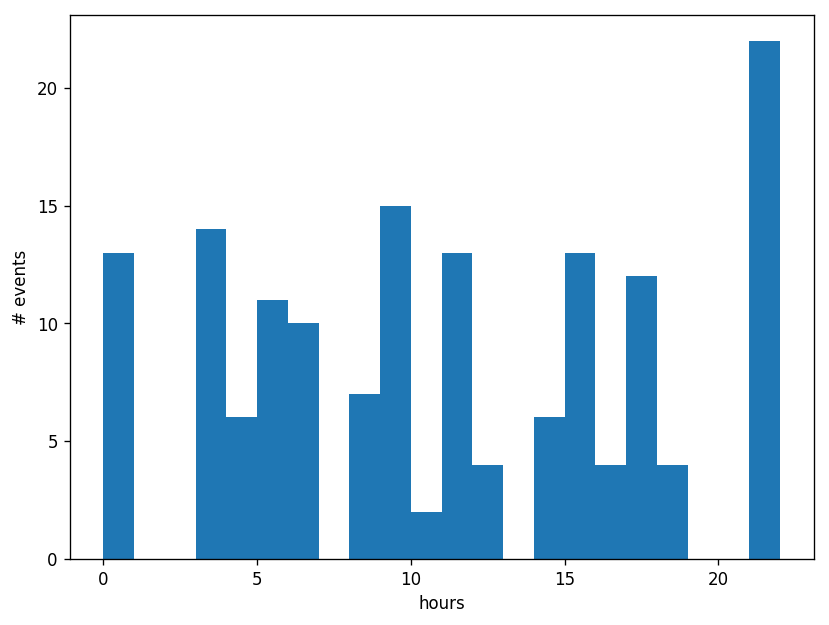

In [4]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    tdel = tdelta.seconds/3600
    delta_times_seconds.append(tdel);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel('hours')
plt.ylabel('# events')
plt.hist(delta_times_seconds, bins = np.arange(max(delta_times_seconds)))
plt.savefig('1-1-13 - 1-1-14 ns53---M>6,L<0.05.png')
plt.show()